Que. 4

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). Build Linear Regression Model and evaluate it with measuring different errors.

use polynomial regression.

Dataset : IceCreamData.csv

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [57]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [58]:
x = df['Temperature']
y = df['Revenue']

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x = pd.DataFrame(x)
poly.fit(x)

x_new = poly.transform(x)



In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new,y,train_size=0.7,random_state=12345)

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_true = y_test
y_pred = model.predict(x_test)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 20.202626755588444
mse = 654.1394784986315
rmse = 25.576150580152433
r2 = 0.9784316281262379


In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(x_test)

new_component = pca.transform(x_test)


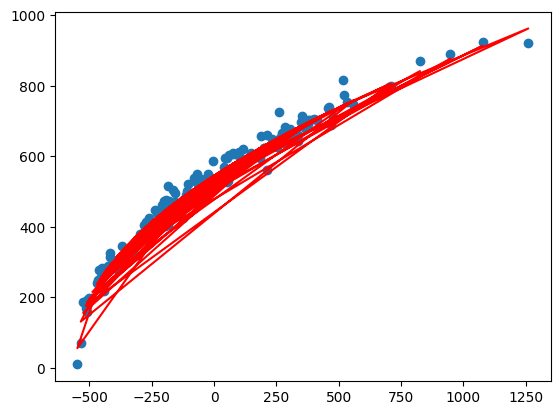

In [72]:
plt.scatter(new_component, y_test)
plt.plot(new_component, y_pred, color="red")